In [2]:
import numpy as np
import pandas as pd

<ipython-input-2-59ab05e21164>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Q1. Pearson correlation coefficient is a measure of the linear relationship between two variables. Suppose  you have collected data on the amount of time students spend studying for an exam and their final exam scores. Calculate the Pearson correlation coefficient between these two variables and interpret the result.

In [3]:
data = {
    'Study_Time': [10, 12, 14, 16, 18, 20, 22, 24],
    'Exam_Score': [70, 75, 80, 85, 90, 95, 97, 100]
}

In [4]:
df=pd.DataFrame(data)

In [5]:
df

,Study_Time,Exam_Score
0,10,70
1,12,75
2,14,80
3,16,85
4,18,90
5,20,95
6,22,97
7,24,100


In [6]:
df.corr(method='pearson')

,Study_Time,Exam_Score
Study_Time,1.000000,0.993247
Exam_Score,0.993247,1.000000


### Q2. Spearman's rank correlation is a measure of the monotonic relationship between two variables. Suppose you have collected data on the amount of sleep individuals get each night and their overall job  satisfaction level on a scale of 1 to 10. Calculate the Spearman's rank correlation between these two variables and interpret the result.

In [7]:
data = {
    'Sleep_Hours': [6, 7, 5, 8, 6, 7, 9, 4],
    'Job_Satisfaction': [5, 6, 4, 8, 6, 7, 9, 3]
}

In [8]:
df=pd.DataFrame(data)

In [9]:
df

,Sleep_Hours,Job_Satisfaction
0,6,5
1,7,6
2,5,4
3,8,8
4,6,6
5,7,7
6,9,9
7,4,3


In [10]:
df.corr(method='spearman')

,Sleep_Hours,Job_Satisfaction
Sleep_Hours,1.000000,0.969715
Job_Satisfaction,0.969715,1.000000


### Pearson and Spearman in Terms of outlier 

#### Pearson
**Sensitive to Outliers:**
Since Pearson correlation uses the actual values of the data points, it is highly sensitive to outliers. Outliers can disproportionately affect the correlation coefficient, making it either much higher or lower than it would be without those outliers.

#### Spearman
**Robust to Outliers:** Since Spearman's rank correlation uses the ranks of the data rather than the actual values, it is less affected by outliers. Outliers may change the ranks, but they won't have as significant an impact on the correlation coefficient as they would with Pearson correlation.

### Q3. Suppose you are conducting a study to examine the relationship between the number of hours of  exercise per week and body mass index (BMI) in a sample of adults. You collected data on both variables for 50 participants. Calculate the Pearson correlation coefficient and the Spearman's rank correlation between these two variables and compare the results.

In [15]:
hours=np.random.randint(1 , 7 , 50)
bmi=np.random.uniform(1 , 50 , 50)

In [16]:
df=pd.DataFrame({
    'Hours Of workout' : hours,
    'BMI' : bmi
})

In [18]:
df.head()

,Hours Of workout,BMI
0,6,35.287416
1,2,46.720617
2,2,36.457571
3,2,38.331256
4,3,44.088200


In [19]:
df.corr(method='pearson')

,Hours Of workout,BMI
Hours Of workout,1.000000,-0.172127
BMI,-0.172127,1.000000


In [20]:
df.corr(method='spearman')

,Hours Of workout,BMI
Hours Of workout,1.000000,-0.163131
BMI,-0.163131,1.000000


### Result Interpretation


Both prearson and spearman depicts weak negative corr between Hours of BMI . This means that, generally, as the number of exercise hours increases, BMI tends to decrease slightly, but the relationship is not very strong.

### Q4. A researcher is interested in examining the relationship between the number of hours individuals spend watching television per day and their level of physical activity. The researcher collected data on both variables from a sample of 50 participants. Calculate the Pearson correlation coefficient between these two variables.

In [22]:
hours=np.random.randint(1, 8 , 50)
physical_activity=np.random.randint(1 ,3 ,50)

In [23]:
df=pd.DataFrame({
    'Hours' : hours,
    'Activity' : physical_activity
})

In [24]:
df.head()

,Hours,Activity
0,2,1
1,3,1
2,4,1
3,5,2
4,7,2


In [25]:
df.corr(method='pearson')

,Hours,Activity
Hours,1.000000,0.037092
Activity,0.037092,1.000000


### Q5. A survey was conducted to examine the relationship between age and preference for a particular brand of soft drink. The survey results are shown below:

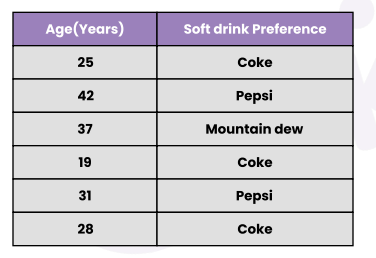

In [28]:
data = {
    "Age (Years)": [25, 42, 37, 19, 31, 28],
    "Soft drink Preference": ["Coke", "Pepsi", "Mountain Dew", "Coke", "Pepsi", "Coke"]
}
df=pd.DataFrame(data)

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
encoded_df=ohe.fit_transform(df[['Soft drink Preference']]).toarray()
encoded_df

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [33]:
encoded_df=pd.DataFrame(encoded_df  , columns=ohe.get_feature_names_out())
encoded_df

,Soft drink Preference_Coke,Soft drink Preference_Mountain Dew,Soft drink Preference_Pepsi
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [37]:
final_df=pd.concat([df , encoded_df], axis=1)

In [38]:
final_df

,Age (Years),Soft drink Preference,Soft drink Preference_Coke,Soft drink Preference_Mountain Dew,Soft drink Preference_Pepsi
0,25,Coke,1.0,0.0,0.0
1,42,Pepsi,0.0,0.0,1.0
2,37,Mountain Dew,0.0,1.0,0.0
3,19,Coke,1.0,0.0,0.0
4,31,Pepsi,0.0,0.0,1.0
5,28,Coke,1.0,0.0,0.0


In [39]:
df

,Age (Years),Soft drink Preference
0,25,Coke
1,42,Pepsi
2,37,Mountain Dew
3,19,Coke
4,31,Pepsi
5,28,Coke


In [46]:
encoded_data=df.groupby(by="Soft drink Preference")['Age (Years)'].mean().to_dict()
encoded_data

{'Coke': 24.0, 'Mountain Dew': 37.0, 'Pepsi': 36.5}

In [48]:
df['Encoded_Soft_Drink']=df['Soft drink Preference'].map(encoded_data)
df

,Age (Years),Soft drink Preference,Encoded_Soft_Drink
0,25,Coke,24.0
1,42,Pepsi,36.5
2,37,Mountain Dew,37.0
3,19,Coke,24.0
4,31,Pepsi,36.5
5,28,Coke,24.0


In [50]:
df.drop(['Soft drink Preference'] , axis=1 ,  inplace=True)

In [51]:
df

,Age (Years),Encoded_Soft_Drink
0,25,24.0
1,42,36.5
2,37,37.0
3,19,24.0
4,31,36.5
5,28,24.0


In [52]:
df.corr(method='pearson')

,Age (Years),Encoded_Soft_Drink
Age (Years),1.00000,0.83753
Encoded_Soft_Drink,0.83753,1.00000


### Q6. A company is interested in examining the relationship between the number of sales calls made per day  and the number of sales made per week. The company collected data on both variables from a sample of 30 sales representatives. Calculate the Pearson correlation coefficient between these two variables

In [53]:
data = {
    'Sales_Calls_Per_Day': np.random.randint(5, 20, 30),  # Random number of sales calls per day between 5 and 20
    'Sales_Per_Week': np.random.randint(10, 50, 30)  # Random number of sales per week between 10 and 50
}

In [54]:
df=pd.DataFrame(data)

In [55]:
df.head()

,Sales_Calls_Per_Day,Sales_Per_Week
0,7,45
1,10,31
2,6,46
3,11,44
4,18,24


In [56]:
df.corr(method='pearson')

,Sales_Calls_Per_Day,Sales_Per_Week
Sales_Calls_Per_Day,1.000000,0.270116
Sales_Per_Week,0.270116,1.000000


In [57]:
df.corr(method='spearman')

,Sales_Calls_Per_Day,Sales_Per_Week
Sales_Calls_Per_Day,1.000000,0.245909
Sales_Per_Week,0.245909,1.000000
